# 3.35

考虑一个连续时间线性时不变系统 $S$，其频率响应为

$$
H(j\omega) = \begin{cases}
1, & |\omega| \ge 250 \\
0, & \rm otherwise
\end{cases}
$$

当输入到系统的信号 $x(t)$ 的基波周期为 $T = \frac{\pi}{7} $，傅立叶级数系数为 $a_k$ 时，发现输出 $y(t) = x(t)$。问对于什么样的 $k$ 值，才有 $a_k = 0$?

## Answer

输入入信号基波频率为
$$
T=\frac{\pi}{7}\quad\Rightarrow\quad \omega_0=\frac{2\pi}{T}=14,
$$

又因为系统输入

$$
x(t) = \sum_{k = -\infty}^{\infty}a_ke^{j\omega_0t}
$$

故响应信号 $y(t)$ 为

$$
y(t) = \sum_{k = -\infty}^{\infty} a_kH(j\omega_0k) e^{j\omega_0kt}
$$

第 $k$ 个谐波对应频率为
$$
\omega_k=14k.
$$

由于系统频率响应
$$
H(j\omega)=
\begin{cases}
1, & |\omega|\ge 250,\\[1mm]
0, & |\omega|<250,
\end{cases}
$$
要求 $y(t)=x(t)$ 则输入信号中被滤除的部分（即 $|\omega|<250$）不存在，因此必须满足
$$
|\omega_k|<250\quad\Rightarrow\quad |14k|<250\quad\Rightarrow\quad |k|<\frac{250}{14}< 18.
$$

因为 $k$ 为整数，所以当
$$
|k|\le 17\quad (k=-17,-16,\ldots,0,\ldots,16,17)
$$
时，必有 $a_k=0$。

# 4.21(g)

求下列信号的傅立叶变换。

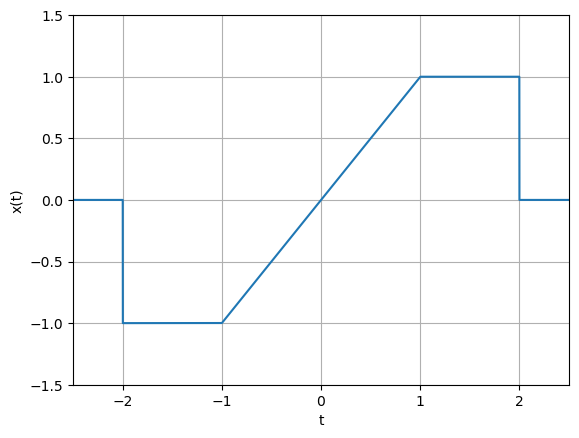

In [34]:
import matplotlib.pyplot as plt
import numpy as np

eps = 1e-3
x = np.linspace(-2.5, 2.5, 100000)
y = []
for xi in x:
    if xi < -2:
        y.append(0)
        continue
    if xi > 2:
        y.append(0)
        continue
    if np.abs(xi + 2) < eps:
        y.append(0)
    elif xi <= -1:
        y.append(-1)
    elif xi <= 1:
        y.append(xi)
    elif np.abs(xi - 2) < eps:
        y.append(0)
    else:
        y.append(1)
plt.plot(x, y)
# 设置坐标轴刻度
plt.grid()
plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

给定信号 
$$
x(t)=
\begin{cases}
0, & t < -2 \text{ 或 } t > 2,\\[1mm]
-1, & -2 \le t < -1,\\[1mm]
t, & -1 \le t \le 1,\\[1mm]
1, & 1 < t \le 2,
\end{cases}
$$
其傅立叶变换定义为
$$
X(j\omega)=\int_{-\infty}^{+\infty} x(t) \, e^{-j\omega t}\,dt.
$$

由 $x(t)$ 的分段定义，上式可分为三部分积分：
$$
X(j\omega)=I_1+I_2+I_3,
$$
其中
$$
I_1=-\int_{-2}^{-1} e^{-j\omega t}\,dt,\quad
I_2=\int_{-1}^{1} t\, e^{-j\omega t}\,dt,\quad
I_3=\int_{1}^{2} e^{-j\omega t}\,dt.
$$

## 1. 计算 $I_1$
$$
\begin{aligned}
I_1 &=-\int_{-2}^{-1} e^{-j\omega t}\,dt
=-\left[\frac{e^{-j\omega t}}{-j\omega}\right]_{t=-2}^{-1}\\[1mm]
&=\frac{1}{j\omega}\Bigl(e^{-j\omega(-1)}-e^{-j\omega(-2)}\Bigr)
=\frac{1}{j\omega}\Bigl(e^{j\omega}-e^{2j\omega}\Bigr).
\end{aligned}
$$

## 2. 计算 $I_2$
利用分部积分法，令
$$
u=t,\quad dv=e^{-j\omega t}\,dt,\quad du=dt,\quad v=\frac{e^{-j\omega t}}{-j\omega}.
$$
则
$$
\begin{aligned}
I_2 &= \left. t\cdot \frac{e^{-j\omega t}}{-j\omega} \right|_{t=-1}^{1} - \int_{-1}^{1}\frac{e^{-j\omega t}}{-j\omega}\,dt\\[1mm]
&=-\frac{1}{j\omega}\Bigl[e^{-j\omega t}\,t\Bigr]_{t=-1}^{1} + \frac{1}{j\omega}\int_{-1}^{1}e^{-j\omega t}\,dt\\[1mm]
&=-\frac{1}{j\omega}\Bigl(e^{-j\omega}\cdot 1 - (-1)\,e^{j\omega}\Bigr)
-\frac{1}{(j\omega)^2}\Bigl(e^{-j\omega}-e^{j\omega}\Bigr)\\[1mm]
&=-\frac{1}{j\omega}\Bigl(e^{-j\omega}+e^{j\omega}\Bigr)
-\frac{1}{(j\omega)^2}\Bigl(e^{-j\omega}-e^{j\omega}\Bigr).
\end{aligned}
$$
注意到
$$
e^{-j\omega}+e^{j\omega}=2\cos\omega,\quad e^{-j\omega}-e^{j\omega}=-2j\sin\omega,\quad (j\omega)^2=-\omega^2,
$$
从而
$$
\frac{1}{(j\omega)^2}=-\frac{1}{\omega^2},
$$
故
$$
I_2=-\frac{2\cos\omega}{j\omega}+\frac{2j\sin\omega}{\omega^2}
=2j\left(\frac{\cos\omega}{\omega}-\frac{\sin\omega}{\omega^2}\right).
$$

## 3. 计算 $I_3$
$$
\begin{aligned}
I_3 &= \int_{1}^{2} e^{-j\omega t}\,dt
=\left[\frac{e^{-j\omega t}}{-j\omega}\right]_{t=1}^{2}\\[1mm]
&=\frac{1}{j\omega}\Bigl(e^{-j\omega}-e^{-2j\omega}\Bigr).
\end{aligned}
$$

故信号的傅立叶变换为
$$
\boxed{
X(j\omega)=\frac{1}{j\omega}\Bigl(e^{j\omega}-e^{2j\omega}+e^{-j\omega}-e^{-2j\omega}\Bigr)
+2j\left(\frac{\cos\omega}{\omega}-\frac{\sin\omega}{\omega^2}\right).
}
$$


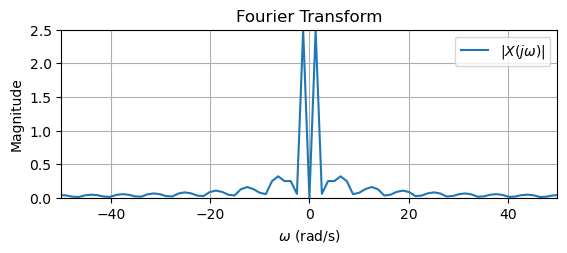

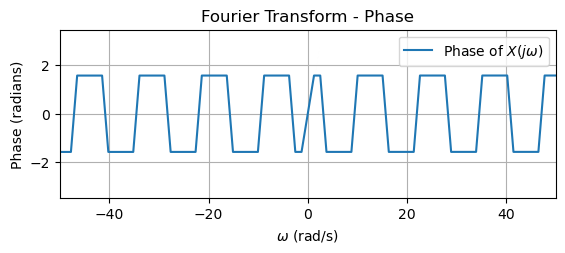

In [35]:
# 计算傅立叶变换（采用 FFT 离散近似连续 FT）
N = len(y)
dt = x[1] - x[0]  # 采样间隔
# FFT 计算后乘以 dt 作为离散傅立叶变换的近似积分
Y = np.fft.fftshift(np.fft.fft(y)) * dt  
# 对应频率轴 & 转换到角频率 omega
freq = np.fft.fftshift(np.fft.fftfreq(N, d=dt))  # 单位：Hz
omega = 2 * np.pi * freq  # 单位：rad/s

# 绘制傅立叶变换幅度谱
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(Y), label='|$X(j\\omega)$|')
plt.xlim(-50, 50)
plt.ylim(0, 2.5)
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.grid(True)
plt.legend()
plt.show()

# 计算相位谱
phase = np.angle(Y)
# 绘制傅立叶变换相位谱
plt.figure()
plt.subplot(2, 1, 2)
plt.plot(omega, phase, label='Phase of $X(j\\omega)$')
plt.xlim(-50, 50)
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel('Phase (radians)')
plt.title('Fourier Transform - Phase')
plt.grid(True)
plt.legend()
plt.show()

# 4.22

求下列变换对应的连续信号。

## (c)

给定变换
$$
\begin{aligned}
|X(j\omega)| &= \begin{cases}
-\omega, & -1\le \omega \le 0,\\[1mm]
\omega, & 0\le \omega \le 1,\\[1mm]
0, & \text{otherwise},
\end{cases}\\[1mm]
\angle X(j\omega) &= -3\omega.
\end{aligned}
$$

由此有
$$
X(j\omega)=|X(j\omega)|e^{j\angle X(j\omega)}
=\begin{cases}
-\omega\, e^{-j3\omega}, & -1\le \omega \le 0,\\[1mm]
\omega\, e^{-j3\omega}, & 0\le \omega \le 1,\\[1mm]
0, & \text{otherwise.}
\end{cases}
$$

连续信号由傅立叶反变换给出
$$
x(t)=\frac{1}{2\pi}\int_{-\infty}^{+\infty}X(j\omega)e^{j\omega t}d\omega
=\frac{1}{2\pi}\int_{-1}^{1}X(j\omega)e^{j\omega t}d\omega.
$$

将积分分为两部分，
$$
x(t)=\frac{1}{2\pi}\left[\int_{-1}^{0}(-\omega)e^{-j3\omega}e^{j\omega t}d\omega
+\int_{0}^{1}\omega\,e^{-j3\omega}e^{j\omega t}d\omega \right].
$$

对第一项，令 $\omega=-\nu$，则
$$
\begin{aligned}
\int_{-1}^{0}(-\omega)e^{-j3\omega}e^{j\omega t}d\omega 
&=\int_{1}^{0}\nu\,e^{-j3(-\nu)}e^{j(-\nu)t}(-d\nu)\\[1mm]
&=\int_{0}^{1}\nu\,e^{j3\nu}e^{-j\nu t}d\nu.
\end{aligned}
$$

因此，
$$
\begin{aligned}
x(t)
&=\frac{1}{2\pi}\left[\int_{0}^{1}\nu\,e^{j3\nu}e^{-j\nu t}d\nu
+\int_{0}^{1}\omega\,e^{-j3\omega}e^{j\omega t}d\omega \right]\\[1mm]
&=\frac{1}{2\pi}\int_{0}^{1}\omega\Bigl[e^{j\omega(3-t)}+e^{-j\omega(3-t)}\Bigr]d\omega\\[1mm]
&=\frac{1}{2\pi}\int_{0}^{1}2\omega\,\cos\bigl(\omega(3-t)\bigr)d\omega\\[1mm]
&=\frac{1}{\pi}\int_{0}^{1}\omega\,\cos\bigl(\omega(3-t)\bigr)d\omega.
\end{aligned}
$$

令 $a=3-t$，使用积分公式
$$
\int \omega\cos(a\omega)d\omega
=\frac{\omega\sin(a\omega)}{a}+\frac{\cos(a\omega)}{a^2}+C,
$$
则
$$
\int_{0}^{1}\omega\cos(a\omega)d\omega
=\frac{\sin a}{a}+\frac{\cos a-1}{a^2}.
$$

故最终连续信号为
$$
\boxed{
x(t)=\frac{1}{\pi}\left[\frac{\sin(3-t)}{3-t}+\frac{\cos(3-t)-1}{(3-t)^2}\right].
}
$$

## (d)

给出

$$
X(j\omega) = 2[\delta(\omega - 1) - \delta(\omega + 1)] + 3[\delta(\omega - 2\pi) + \delta(\omega + 2\pi)]
$$

连续信号为

$$
x(t) = \frac{1}{2\pi}\int_{-\infty}^\infty X(j\omega)e^{j\omega t}d\omega = \frac{1}{2\pi}\left(2(e^{j} - e^{-j}) + 3(e^{2\pi j} + e^{-2\pi j})\right)
$$



$$
\begin{aligned}
x(t)
&=\frac{1}{2\pi}\left\{2\Bigl(2j\sin t\Bigr) + 3\Bigl(2\cos(2\pi t)\Bigr)\right\}\\[1mm]
&=\frac{1}{2\pi}\left(4j\sin t + 6\cos(2\pi t)\right)\\[1mm]
&=\frac{2j\sin t}{\pi}+\frac{3\cos(2\pi t)}{\pi}.
\end{aligned}
$$

因此，信号的时域表达式为
$$
\boxed{ x(t)=\frac{2j\sin t}{\pi}+\frac{3\cos(2\pi t)}{\pi}\,. }
$$